In [1]:
from unittest import TestCase
from fastai.callbacks import SaveModelCallback

from fastai.metrics import error_rate
from fastai.vision import ImageList, Path, LabelList, LabelLists, models, accuracy, cnn_learner, FloatList, create_cnn, \
    load_learner, DatasetType, load_data, ShowGraph
from torch.nn.functional import cross_entropy
import config
import pandas as pd
from learners import cnn_learner as f22_cnn_learner
from services import pickle_service, file_service

logger = config.create_logger(__name__)

In [2]:
image_path = Path('C:\\Kaggle Downloads\\deepfake-detection-challenge\\output\\merged\\images')
file_path = Path(config.OUTPUT_MODEL_PAR_PATH, 'cnn_resnet34__2020-03-29T23-56-43-794897.pkl_16')

pickle_par_path = Path(config.OUTPUT_MODEL_PAR_PATH, 'data')

# df_test = pd.read_pickle(Path(pickle_par_path, 'df_test'))

databunch = load_data(bs=64, path=pickle_par_path)

# data_test = (ImageList.from_df(df=df_test, path=image_path, cols='filename').split_none()
#              .label_from_df(cols='real_or_fake_digit'))
# databunch.add_test(data_test, label=None)

learn = cnn_learner(databunch, models.resnet18, metrics=[error_rate, accuracy, cross_entropy])
learn.load(file_path)
learn.model.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [3]:
# learn.save('before-learner')
# learn.lr_find()
# learn.recorder.plot()
# learn.load('before-learner')

epoch,train_loss,valid_loss,error_rate,accuracy,cross_entropy,time
0,0.507810,0.544542,0.276372,0.723628,0.544542,19:58
1,0.498194,0.544282,0.276119,0.723881,0.544282,20:01
2,0.501312,0.545040,0.277082,0.722918,0.545040,19:35


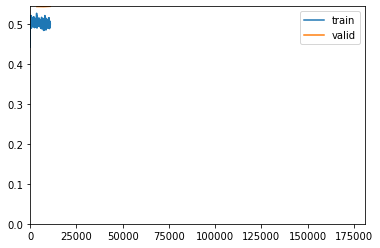

BrokenPipeError: [Errno 32] Broken pipe

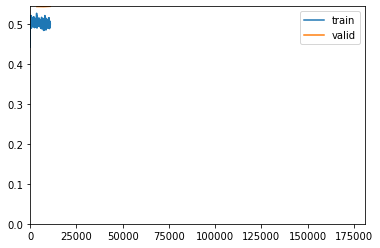

In [4]:
file_path = file_service.get_unique_persist_filename(config.OUTPUT_MODEL_PAR_PATH, base_output_stem=f'cnn_resnet18_', extension='pkl', use_date=True)

learn.freeze_to(-2)
learn.fit_one_cycle(50, slice(2e-06,3e-06), callbacks=[ShowGraph(learn), SaveModelCallback(learn, every='epoch',  
                  monitor='cross_entropy', name=file_path)])